In [1]:
from pymskt.mesh import BoneMesh, Mesh
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os
from pymskt.image import create_vtk_image
from pymskt.image.cartilage_processing import combine_depth_region_segs

In [2]:
location_seg = '../../data/right_knee_example.nrrd'
seg = sitk.ReadImage(location_seg)
seg_array = sitk.GetArrayFromImage(seg)

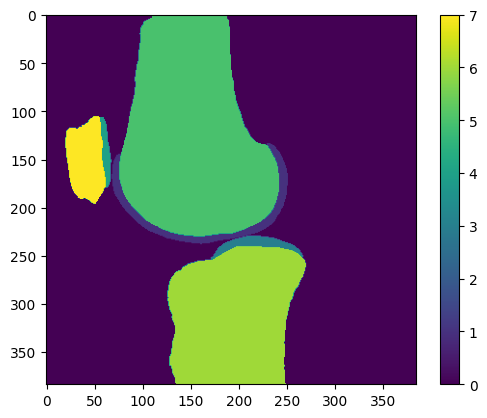

In [3]:
plt.imshow(seg_array[100, :, :])
plt.colorbar()
plt.show()

In [4]:
# initiate the bone mesh object
femur = BoneMesh(path_seg_image=location_seg,  # path to the segmentation iamge being used
                 label_idx=5,                  # what is the label of this bone
                 list_cartilage_labels=[1])    # a list of labels for cartialge associated w/ this bone

# Create the bone mesh
femur.create_mesh(
    smooth_image_var=1.0       # This is the variance of the gaussian filter applied to binary image b4 meshing
)

# Resample the bone surface to have a specified number of nodes. 
femur.resample_surface(
    clusters=20000             # This is the number of nodes/vertices on the surface. It might vary slightly
)

femur_new_seg, femur_rel_depth = femur.break_cartilage_into_superficial_deep(rel_depth_thresh=0.5, return_rel_depth=True, resample_cartilage_surface=10_000)

(10000, 3)
(20000, 3)
number of intersections: 5262


In [5]:
tibia = BoneMesh(path_seg_image=location_seg, label_idx=6, list_cartilage_labels=[2,3])
tibia.create_mesh(smooth_image_var=1.0)
tibia.resample_surface(clusters=20_000)
tibia_new_seg, tibia_rel_depth = tibia.break_cartilage_into_superficial_deep(rel_depth_thresh=0.5, return_rel_depth=True, resample_cartilage_surface=10_000)

(10000, 3)
(19999, 3)
number of intersections: 5085
(10000, 3)
(19999, 3)
number of intersections: 5155


In [6]:
patella = BoneMesh(path_seg_image=location_seg, label_idx=7, list_cartilage_labels=[4])
patella.create_mesh(smooth_image_var=1.0)
patella.resample_surface(clusters=20_000)
patella_new_seg, patella_rel_depth = patella.break_cartilage_into_superficial_deep(rel_depth_thresh=0.5, return_rel_depth=True, resample_cartilage_surface=10_000)


(10000, 3)
(19998, 3)
number of intersections: 5191


In [7]:
new_seg_combined = combine_depth_region_segs(
    seg,
    [patella_new_seg, tibia_new_seg, femur_new_seg],
)

In [8]:
sitk.WriteImage(new_seg_combined, 'new_seg_combined_basic_regions_depth.nrrd')